In [46]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [47]:
data=pd.read_csv('suv.csv')
print(data.shape)
data.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,16804002,Male,19,76000,0


# Analyzing data

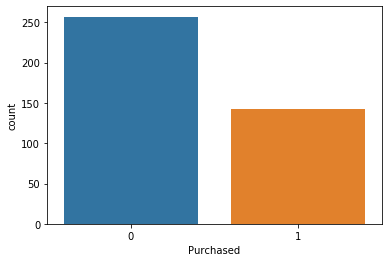

In [48]:
sns.countplot(x='Purchased',data=data)

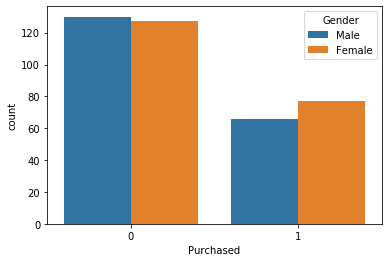

In [49]:
sns.countplot(x='Purchased',hue='Gender',data=data)

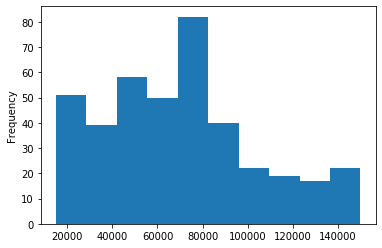

In [50]:
data['EstimatedSalary'].plot.hist()

# Data Wrangling

In [51]:
data.isnull().sum()                                   

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

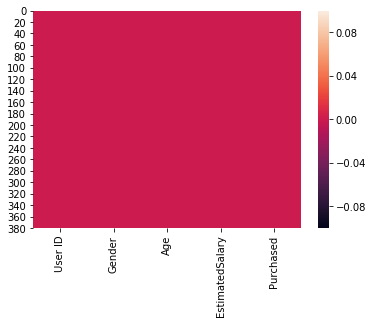

In [52]:
#the data is already clean
sns.heatmap(data.isnull())

# Train Data

In [53]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_test=sc.fit_transform(x_test)
x_train=sc.transform(x_train)


In [55]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=logmodel.predict(x_test)


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.89